In [0]:
ls


Data_Train.xlsx  sample_data/  Test_set.xlsx


In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
df_train=pd.read_excel("Data_Train.xlsx")
df_test=pd.read_excel("Test_set.xlsx")


In [0]:
print(df_train.head())

       Airline Date_of_Journey    Source  ... Total_Stops Additional_Info  Price
0       IndiGo      24/03/2019  Banglore  ...    non-stop         No info   3897
1    Air India       1/05/2019   Kolkata  ...     2 stops         No info   7662
2  Jet Airways       9/06/2019     Delhi  ...     2 stops         No info  13882
3       IndiGo      12/05/2019   Kolkata  ...      1 stop         No info   6218
4       IndiGo      01/03/2019  Banglore  ...      1 stop         No info  13302

[5 rows x 11 columns]


In [0]:
print(df_test.head())

             Airline Date_of_Journey  ... Total_Stops              Additional_Info
0        Jet Airways       6/06/2019  ...      1 stop                      No info
1             IndiGo      12/05/2019  ...      1 stop                      No info
2        Jet Airways      21/05/2019  ...      1 stop  In-flight meal not included
3  Multiple carriers      21/05/2019  ...      1 stop                      No info
4           Air Asia      24/06/2019  ...    non-stop                      No info

[5 rows x 10 columns]


In [0]:
#This will return how many rows have NaN values in each column
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [0]:
#Dropping these Nan Values
df_train.dropna(inplace=True)
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [0]:
#dropping duplicate rows if there are any
no_of_duplicates=df_train[df_train.duplicated()]
no_of_duplicates.shape
df_train.drop_duplicates(keep='first',inplace=True)

# **Data Cleaning**


In [0]:
print(df_train["Additional_Info"].value_counts())

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64


In [0]:
# replace repeating value in train set
df_train["Additional_Info"] = df_train["Additional_Info"].replace({'No Info': 'No info'})
print(df_train["Additional_Info"].value_counts())

No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64


In [0]:
print(df_train["Destination"].value_counts())

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


In [0]:
#delhi new delhi are same so we replace
df_train=df_train.replace({"Delhi":"New Delhi"})
df_test=df_test.replace({"Delhi":"New Delhi"})
print(df_train["Destination"].value_counts())
print(df_test["Destination"].value_counts())

Cochin       4345
Banglore     2860
New Delhi    2179
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
Cochin       1145
Banglore      710
New Delhi     555
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [0]:
#dont rerun this cell again and again else it will give error
df_train.Total_Stops.replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)
df_test.Total_Stops.replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)
df_train["Total_Stops"] = df_train["Total_Stops"].astype(int)
df_test["Total_Stops"] = df_test["Total_Stops"].astype(int)
df_train["Total_Stops"].dtype
print(df_train.Total_Stops)


0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10462, dtype: int64


In [0]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,New Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302


In [0]:
print(df_train.shape)
print(df_test.shape)


(10462, 11)
(2671, 10)


In [0]:
#combining the test and train data frames for a while 
#so we dont have to data preprocessing again and again for both test and train
df_combine=df_train.append(df_test)
print(df_combine)

                Airline Date_of_Journey  ... Additional_Info    Price
0                IndiGo      24/03/2019  ...         No info   3897.0
1             Air India       1/05/2019  ...         No info   7662.0
2           Jet Airways       9/06/2019  ...         No info  13882.0
3                IndiGo      12/05/2019  ...         No info   6218.0
4                IndiGo      01/03/2019  ...         No info  13302.0
...                 ...             ...  ...             ...      ...
2666          Air India       6/06/2019  ...         No info      NaN
2667             IndiGo      27/03/2019  ...         No info      NaN
2668        Jet Airways       6/03/2019  ...         No info      NaN
2669          Air India       6/03/2019  ...         No info      NaN
2670  Multiple carriers      15/06/2019  ...         No info      NaN

[13133 rows x 11 columns]


In [0]:
#Essentially all it does is use integer division (//) to test whether the dayofweek attribute of the DatetimeIndex is less than 5. Normally this would return just a True or False, but tacking on the astype(float) at the end returns a 1 or 0 rather than a boolea
df_combine["Weekend"] = ((pd.to_datetime(df_combine["Date_of_Journey"], format = '%d/%m/%Y').dt.dayofweek) // 5 == 1).astype(int)
df_combine["Day"] = pd.to_datetime(df_combine["Date_of_Journey"], format = '%d/%m/%Y').dt.day_name()
df_combine["Date"] = pd.to_datetime(df_combine["Date_of_Journey"], format = '%d/%m/%Y').dt.day
df_combine["Month"] = pd.to_datetime(df_combine["Date_of_Journey"], format = '%d/%m/%Y').dt.month

In [0]:
#we can drop Date_of_Journey as it is redundant now
df_combine.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)
print(df_combine.head())

       Airline     Source Destination  ...        Day Date Month
0       IndiGo   Banglore   New Delhi  ...     Sunday   24     3
1    Air India    Kolkata    Banglore  ...  Wednesday    1     5
2  Jet Airways  New Delhi      Cochin  ...     Sunday    9     6
3       IndiGo    Kolkata    Banglore  ...     Sunday   12     5
4       IndiGo   Banglore   New Delhi  ...     Friday    1     3

[5 rows x 14 columns]


In [0]:
df_combine.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Weekend,Day,Date,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897.0,1,Sunday,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,0,Wednesday,1,5
2,Jet Airways,New Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882.0,1,Sunday,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0,1,Sunday,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0,0,Friday,1,3


In [0]:
#BREAKING ROUTE

df_combine['Route_1'] = df_combine['Route'] .str.split('→ ').str[0]
df_combine['Route_2'] = df_combine['Route'] .str.split('→ ').str[1]
df_combine['Route_3'] = df_combine['Route'] .str.split('→ ').str[2]
df_combine['Route_4'] = df_combine['Route'] .str.split('→ ').str[3]
df_combine['Route_5'] = df_combine['Route'] .str.split('→ ').str[4]

df_combine['Route_1'].fillna("None",inplace = True)
df_combine['Route_2'].fillna("None",inplace = True)
df_combine['Route_3'].fillna("None",inplace = True)
df_combine['Route_4'].fillna("None",inplace = True)
df_combine['Route_5'].fillna("None",inplace = True)


In [0]:
#dropping route
df_combine.drop(labels = 'Route', axis = 1, inplace = True)

In [0]:

df_combine['Dep_Hour'] = pd.to_datetime(df_combine.Dep_Time).dt.hour
df_combine['Dep_Minutes'] = pd.to_datetime(df_combine.Dep_Time).dt.minute
df_combine.drop(labels = 'Dep_Time', axis = 1, inplace = True)
df_combine['Arr_Hour'] = pd.to_datetime(df_combine.Arrival_Time).dt.hour
df_combine['Arr_Minutes'] = pd.to_datetime(df_combine.Arrival_Time).dt.minute
df_combine.drop(labels = 'Arrival_Time', axis = 1, inplace = True)
#we can drop duration also because arrival and departure give us same info
#df_combine.drop(labels = 'Duration', axis = 1, inplace = True)
df_combine.head()


,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Weekend,Day,Date,Month,Route_1,Route_2,Route_3,Route_4,Route_5,Dep_Hour,Dep_Minutes,Arr_Hour,Arr_Minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,1,Sunday,24,3,BLR,DEL,None,None,None,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,0,Wednesday,1,5,CCU,IXR,BBI,BLR,None,5,50,13,15
2,Jet Airways,New Delhi,Cochin,19h,2,No info,13882.0,1,Sunday,9,6,DEL,LKO,BOM,COK,None,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,1,Sunday,12,5,CCU,NAG,BLR,None,None,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,0,Friday,1,3,BLR,NAG,DEL,None,None,16,50,21,35


In [0]:
# cleaning duration column in datasets
duration = list(df_combine["Duration"])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  
dur_seconds = []
for i in range(len(duration)) :
    dur_minutes.append(int(duration[i].split()[0][:-1])*60 + int(duration[i].split()[1][:-1]))
    dur_seconds.append(int(duration[i].split()[0][:-1])*60*60 + int(duration[i].split()[1][:-1])*60)
df_combine["Duration_minutes"] = dur_minutes
df_combine.drop(["Duration"], axis=1, inplace = True)
df_combine.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Weekend,Day,Date,Month,Route_1,Route_2,Route_3,Route_4,Route_5,Dep_Hour,Dep_Minutes,Arr_Hour,Arr_Minutes,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,1,Sunday,24,3,BLR,DEL,None,None,None,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,No info,7662.0,0,Wednesday,1,5,CCU,IXR,BBI,BLR,None,5,50,13,15,445
2,Jet Airways,New Delhi,Cochin,2,No info,13882.0,1,Sunday,9,6,DEL,LKO,BOM,COK,None,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,1,Sunday,12,5,CCU,NAG,BLR,None,None,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,0,Friday,1,3,BLR,NAG,DEL,None,None,16,50,21,35,285


In [0]:
df_combine.dtypes

Airline              object
Source               object
Destination          object
Total_Stops           int64
Additional_Info      object
Price               float64
Weekend               int64
Day                  object
Date                  int64
Month                 int64
Route_1              object
Route_2              object
Route_3              object
Route_4              object
Route_5              object
Dep_Hour              int64
Dep_Minutes           int64
Arr_Hour              int64
Arr_Minutes           int64
Duration_minutes      int64
dtype: object

In [0]:
print(df_combine["Route_2"].value_counts())
print(df_combine["Route_3"].value_counts())
print(df_combine["Route_4"].value_counts())
print(df_combine["Route_5"].value_counts())
#later on we can change this label encoder to one hot encoder to remove the problem of priority of label encoder
#normalizing the data by changing the categorial data into integer variable
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_combine["Additional_Info"] = le.fit_transform(df_combine["Additional_Info"])
df_combine["Airline"] = le.fit_transform(df_combine["Airline"])
df_combine["Destination"] = le.fit_transform(df_combine["Destination"])
df_combine["Source"] = le.fit_transform(df_combine["Source"])
df_combine['Route_1']= le.fit_transform(df_combine["Route_1"])
df_combine['Route_2']= le.fit_transform(df_combine["Route_2"])
df_combine['Route_3']= le.fit_transform(df_combine["Route_3"])
df_combine['Route_4']= le.fit_transform(df_combine["Route_4"])
df_combine['Route_5']= le.fit_transform(df_combine["Route_5"])
df_combine['Day'] = le.fit_transform(df_combine["Day"])

BOM     4885
DEL     1925
BLR      896
DEL      815
HYD      785
HYD      703
CCU      456
MAA      322
BLR      294
JAI      284
COK      262
AMD      256
BBI      139
IDR      115
GAU      103
CCU       97
PNQ       77
GOI       76
LKO       72
NAG       71
IXR       66
BHO       64
ATQ       51
JDH       49
BDQ       45
IXB       25
TRV       24
UDR       23
RPR       21
VGA       19
COK       19
IXU       15
IXC       14
VNS       13
KNU       12
PAT       11
GWL       10
DED        6
STV        5
HBX        3
JLR        1
IXZ        1
VTZ        1
IXA        1
NDC        1
Name: Route_2, dtype: int64
None    4324
COK     4015
BLR     2280
BOM     1156
DEL      703
DEL      149
MAA      102
COK       88
HYD       58
AMD       52
NAG       30
GOI       20
IDR       19
VGA       18
BBI       18
HYD       16
GAU       15
BHO       14
PNQ       11
HBX        8
JDH        7
IMF        5
ISK        5
UDR        4
VTZ        4
IXR        3
TRV        3
IXC        3
CCU        1
TIR       

In [0]:
df_combine.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Weekend,Day,Date,Month,Route_1,Route_2,Route_3,Route_4,Route_5,Dep_Hour,Dep_Minutes,Arr_Hour,Arr_Minutes,Duration_minutes
0,3,0,4,0,7,3897.0,1,3,24,3,0,13,24,12,4,22,20,1,10,170
1,1,2,0,2,7,7662.0,0,6,1,5,2,25,1,3,4,5,50,13,15,445
2,4,4,1,2,7,13882.0,1,3,9,6,3,32,4,5,4,9,25,4,25,1140
3,3,2,0,1,7,6218.0,1,3,12,5,2,34,3,12,4,18,5,23,30,325
4,3,0,4,1,7,13302.0,0,0,1,3,0,34,8,12,4,16,50,21,35,285


PREPARING FOR MODEL

In [0]:
df_train = df_combine[0:10462]
df_test = df_combine[10462:]
df_test = df_test.drop(['Price'], axis =1)
x_train=df_train.drop(["Price"], axis =1)
y_train=np.log1p(df_train.Price)
print(x_train.shape)
print(y_train.shape)

(10462, 19)
(10462,)


In [0]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_log_error
# We have created a function to print accuracy metrics which can be used
# to get accuracy metrics of all models in upcoming steps
def print_accuracy_report(y_test, y_pred,X_test, model):
 print('R Squared(Accuracy)', metrics.r2_score(y_test, y_pred))   
 print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
 print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
 print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
 print('Root Mean Squared Log Error',np.sqrt(mean_squared_log_error( y_test, y_pred )))

In [0]:
# we have created a function to generate linear regression model
# which can then be called again after feature selection or other steps
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
def LinearRegressionModel(X,y):
 X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
 regressor = LinearRegression()  
 regressor.fit(X_train, y_train)
 y_pred = regressor.predict(X_test)
 print(print_accuracy_report(y_test, y_pred, X_test, regressor))
 return regressor
linearModel = LinearRegressionModel(x_train,y_train)

R Squared(Accuracy) 0.6061118288899254
Mean Absolute Error: 0.2584467151754098
Mean Squared Error: 0.10379663304204617
Root Mean Squared Error: 0.32217484855594514
Root Mean Squared Log Error 0.03236649045818157
None


In [0]:
#similarly define a function for random forest regressor
from sklearn.ensemble import RandomForestRegressor
def RandomForestRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf))
    return rf
randomForestModel = RandomForestRegressorModel(x_train,y_train)

R Squared(Accuracy) 0.9349290726063062
Mean Absolute Error: 0.07181771339273088
Mean Squared Error: 0.017147362291571273
Root Mean Squared Error: 0.13094793733225152
Root Mean Squared Log Error 0.013063213290358757
None


In [0]:
# get feature importances from a model
import matplotlib.pyplot as plt
def plotFeatureImportances(model):
    #first print all features importances in descending order
    feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
    print(feature_importances)
    # Next plot feature importances to get idea about where the curve breaks
    # in the graph i.e. select top appropriate features
    features = x_train.columns.tolist()
    importances = model.feature_importances_
    indices = np.argsort(importances)
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

                  importance
Duration_minutes    0.600584
Airline             0.096954
Date                0.046357
Additional_Info     0.045838
Month               0.044986
Total_Stops         0.034775
Route_2             0.026620
Day                 0.015808
Dep_Minutes         0.015470
Dep_Hour            0.015409
Arr_Hour            0.015090
Arr_Minutes         0.013700
Route_3             0.007179
Destination         0.005524
Route_1             0.005311
Weekend             0.005261
Source              0.003106
Route_4             0.001990
Route_5             0.000039


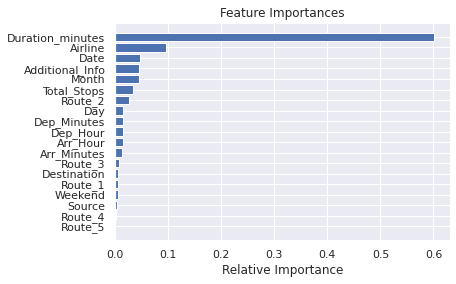

In [0]:
plotFeatureImportances(randomForestModel)


In [0]:
# Since we need to send our final predictions made on test dataset in excel format
# the below function can be used to generate excel file for a given model which can then be submitted
# to the hackathon
def generateFinalPredictionFile(model):
    y_test_pred = model.predict(X_to_predict.values)
    y_test_pred_exp = np.exp(y_test_pred)
    print(y_test_pred_exp)
    pd.DataFrame(y_test_pred_exp, columns = ['Price']).to_excel("Final_Pred.xlsx", index = False)

R Squared(Accuracy) 0.9382912901007459
Mean Absolute Error: 0.06688055788850797
Mean Squared Error: 0.01626135737678956
Root Mean Squared Error: 0.12752002735566503
Root Mean Squared Log Error 0.01271406896535446
None
                  importance
Route_3             0.215119
Total_Stops         0.210996
Duration_minutes    0.125292
Airline             0.102721
Route_2             0.056365
Date                0.052031
Month               0.048954
Additional_Info     0.034241
Destination         0.018900
Arr_Hour            0.018873
Route_4             0.018160
Dep_Minutes         0.016878
Dep_Hour            0.016819
Day                 0.015898
Source              0.013427
Route_1             0.012924
Arr_Minutes         0.012548
Weekend             0.009677
Route_5             0.000177


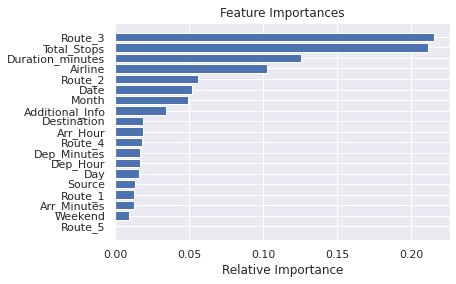

In [0]:
# select features using extratreesclassifier
from sklearn.ensemble import ExtraTreesRegressor
def ExtraTreesRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf = ExtraTreesRegressor()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf))
    return rf
extraTreeRegressorModel = ExtraTreesRegressorModel(x_train,y_train)
plotFeatureImportances(extraTreeRegressorModel)

In [0]:
# select features using XGboost
from xgboost import XGBRegressor
def XGBRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =42, nthread = -1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf))
    return rf
xgbRegressorModel = XGBRegressorModel(x_train,y_train)

R Squared(Accuracy) 0.921421447668181
Mean Absolute Error: 0.10132437318966415
Mean Squared Error: 0.02070686494183075
Root Mean Squared Error: 0.14389880104375696
Root Mean Squared Log Error 0.014420614248796482
None


                  importance
Total_Stops         0.448369
Route_3             0.105457
Duration_minutes    0.100771
Airline             0.057461
Additional_Info     0.043891
Destination         0.041995
Route_4             0.035657
Month               0.031079
Date                0.021589
Day                 0.021127
Route_2             0.019191
Route_1             0.012867
Weekend             0.012385
Source              0.010475
Dep_Hour            0.008027
Route_5             0.007827
Arr_Hour            0.007557
Dep_Minutes         0.007184
Arr_Minutes         0.007091


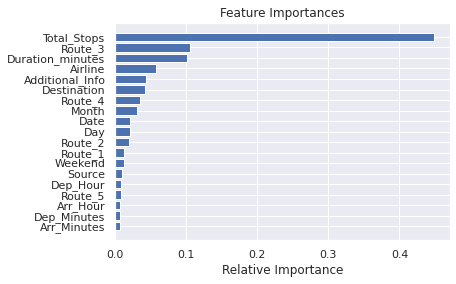

74478279728974892742789273984729874987489274


In [0]:
plotFeatureImportances(xgbRegressorModel)
print("74478279728974892742789273984729874987489274")

In [0]:
# #bad model..explain????
# from sklearn.svm import SVR
# def SVRModel(X,y):
#     X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
#     regressor=SVR(kernel='linear',degree=1)
#     regressor.fit(X_train, y_train)
#     y_pred = regressor.predict(X_test)
#     print(print_accuracy_report(y_test, y_pred, X_test, regressor))
#     return regressor
# svRegressorModel = SVRModel(x_train,y_train)

Graph of various features

count    10462.000000
mean      9026.790289
std       4624.849541
min       1759.000000
25%       5224.000000
50%       8266.000000
75%      12344.750000
max      79512.000000
Name: Price, dtype: float64
Skewness: 1.857490
Kurtosis: 13.527896


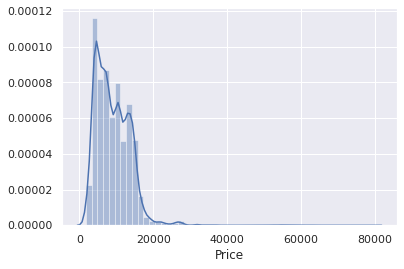

In [0]:
#descriptive statistics summary
import seaborn as sns
print(df_train['Price'].describe())
#skewness and kurtosis
print("Skewness: %f" % df_train['Price'].skew())
print("Kurtosis: %f" % df_train['Price'].kurt())
sns.distplot(df_train['Price'])
#the displot is showing density probability plot in regards with price
#so area under the curve adds up to one.

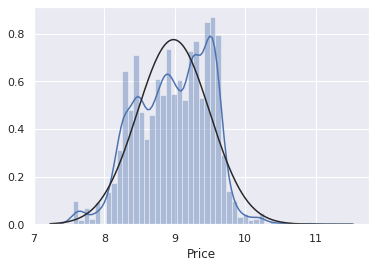

In [0]:
#Due to high positive screwness we will do log tansformation 
from scipy.stats import norm, skew 
sns.distplot(np.log1p(df_train["Price"]) , fit=norm);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


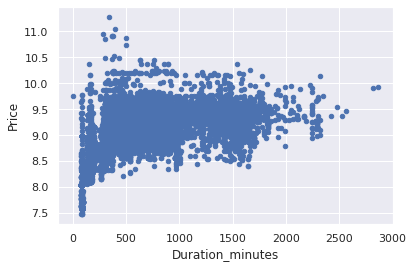

In [0]:
#scatter plot Duration_minutes/Price
var = 'Duration_minutes'
data = pd.concat([y_train, x_train[var]], axis=1)
data.plot.scatter(x=var, y='Price');

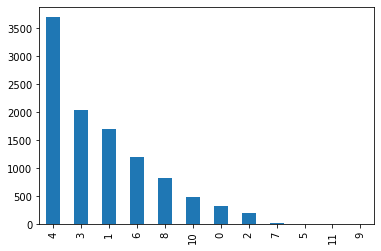

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
carrier_count = x_train["Airline"].value_counts()
carrier_count.plot(kind='bar')

Text(0.5, 1.0, 'Total stops')

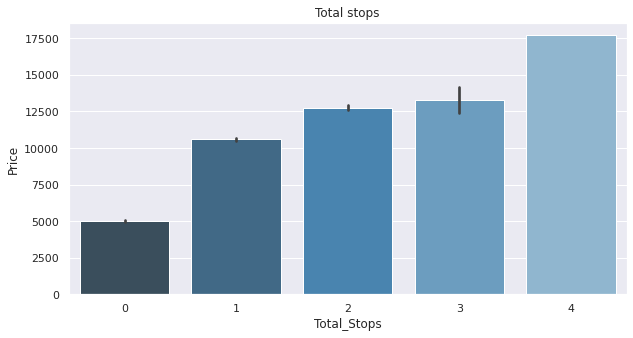

In [0]:
#Variation of price against total number of stops:
sns.set(style="darkgrid")
figure(figsize=(10,5)) 
sns.barplot(x="Total_Stops", y="Price", data=df_train, palette="Blues_d")
plt.title('Total stops')

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000.]), <a list of 9 Text major ticklabel objects>)

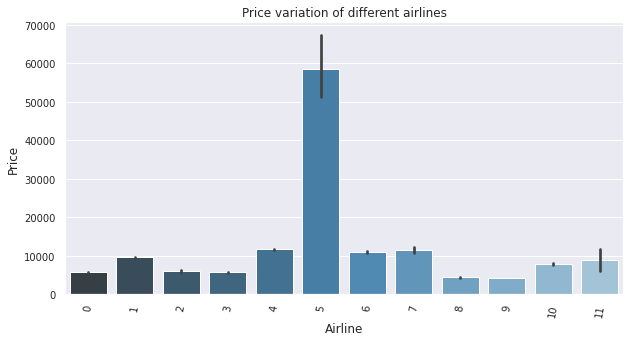

In [0]:
#Variation of price with different airline
sns.set(style="darkgrid")
figure(figsize=(10,5)) 
sns.barplot(x="Airline", y="Price", data=df_train, palette="Blues_d")
plt.title('Price variation of different airlines')
plt.xticks(fontsize=10, rotation=80)
plt.yticks(fontsize=10)

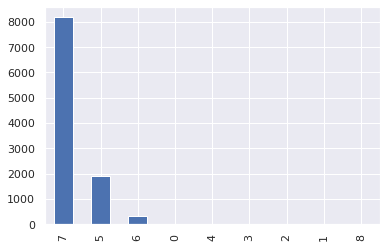

In [0]:
df_train['Additional_Info'].value_counts().plot(kind='bar')

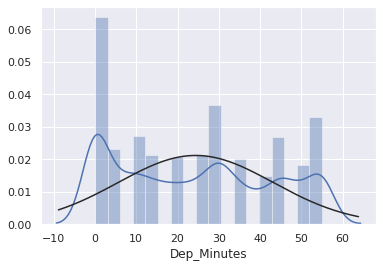

In [0]:
from scipy.stats import norm, skew 
sns.distplot(x_train["Dep_Minutes"] , fit=norm);

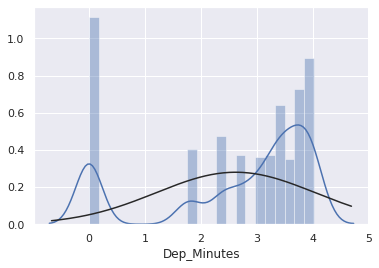

In [0]:
sns.distplot(np.log1p(x_train["Dep_Minutes"]) , fit=norm);

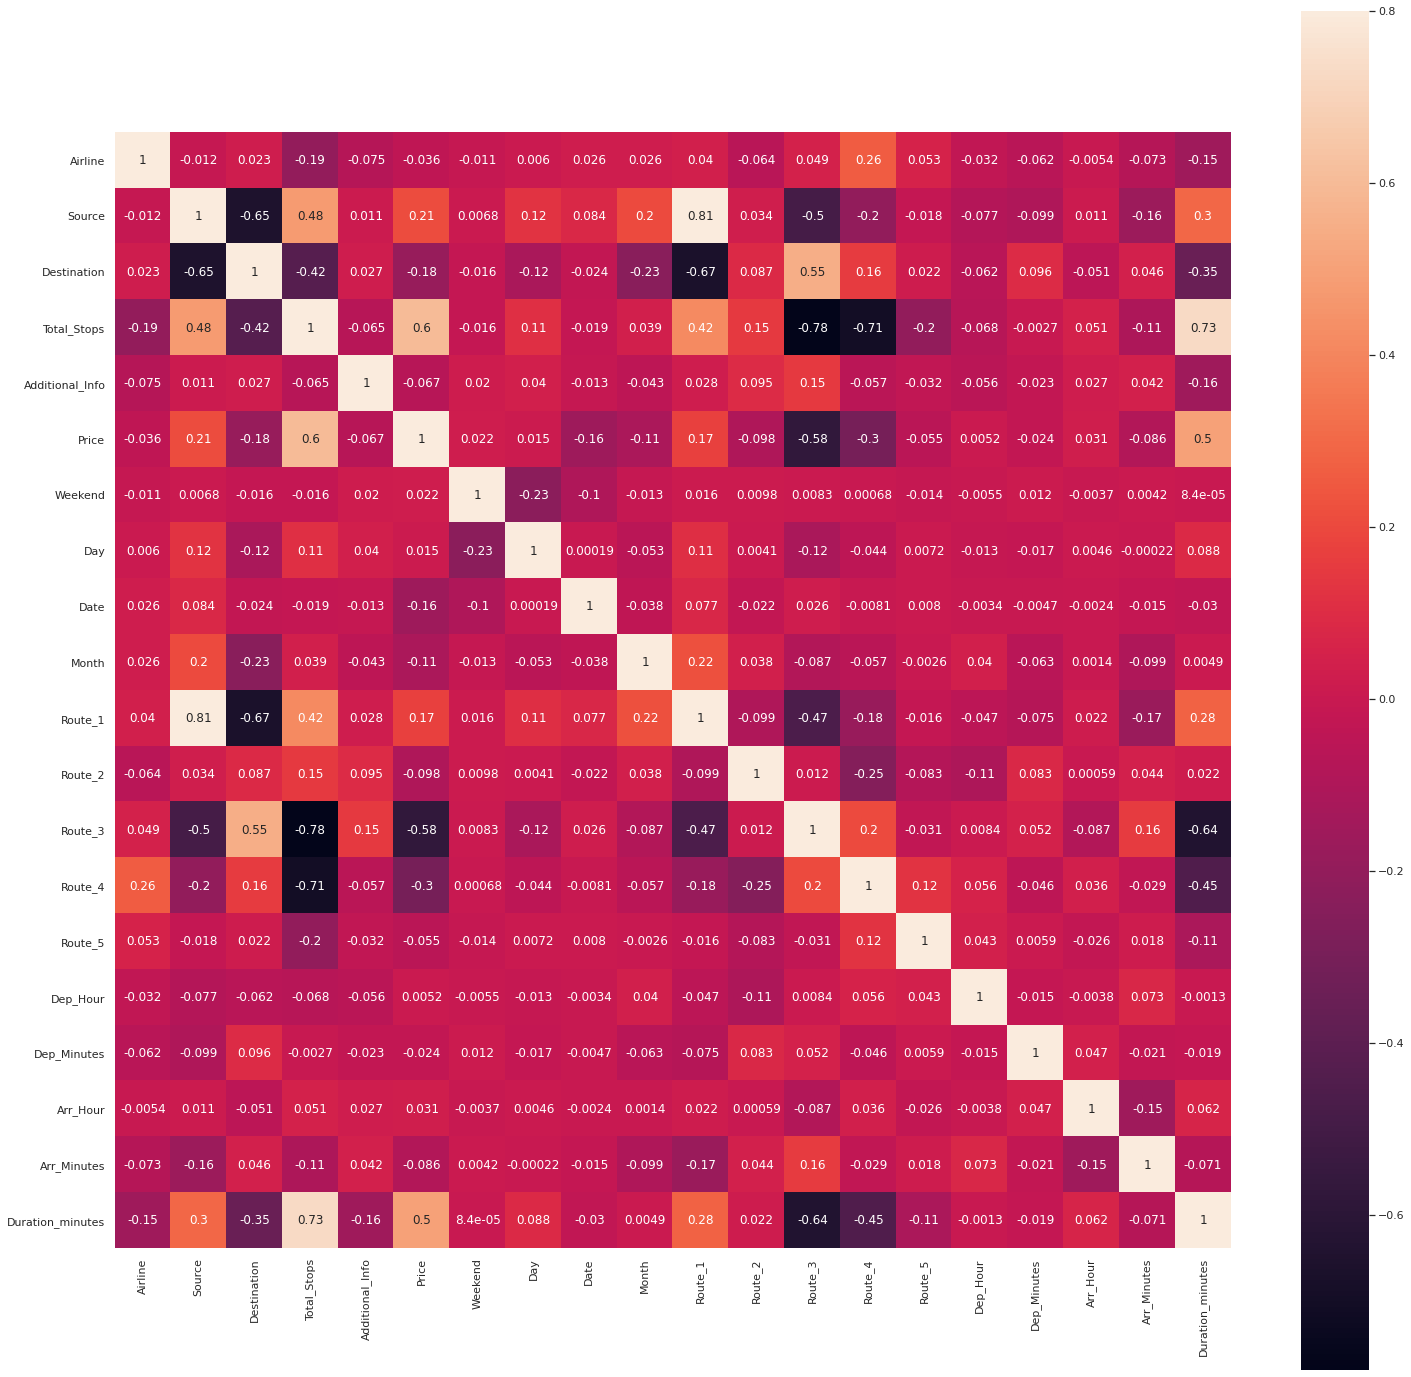

In [0]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);

In [0]:
#Source:- https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

#Validation function
n_folds = 5
x_train=x_train.to_numpy()
y_train=y_train.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(x_train,y_train,random_state=42, test_size=0.3)
   
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model,X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
        # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)
stacked_averaged_models = StackingAveragedModels(base_models = (extraTreeRegressorModel, randomForestModel, xgbRegressorModel),
                                                 meta_model = linearModel)
print("end")
score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

end
Stacking Averaged models score: 0.1238 (0.0042)


In [0]:
stacked_averaged_models.fit(X_train, y_train)
y_pred = stacked_averaged_models.predict(X_test)
print(print_accuracy_report(y_test, y_pred, X_test, stacked_averaged_models))

R Squared(Accuracy) 0.9422941332458397
Mean Absolute Error: 0.07379490857468819
Mean Squared Error: 0.015206536055587555
Root Mean Squared Error: 0.12331478441609325
Root Mean Squared Log Error 0.012320019651070217
None
